In [1]:
import pandas as pd
df = pd.read_hdf('./data.h5')
print(df.shape)
print(df.head())
print(df.sample(3))
'''The store turnover'''
df_turnover = df['price_total'].sum()
print(df_turnover)
print("...............................")
'''Number of customers'''
df_customer = df[True == df.is_canceled]['price_total'].sum()
print(df_customer / 100)
print(df['customer_id'].nunique())
print(df['product_id'].nunique())
print(df['order_id'].nunique())
average_sale = df['price_total'].sum() / df['order_id'].nunique()
print(average_sale)

(820906, 9)
   order_id  customer_id  product_id  quantity  price_unit  price_total  \
0         0            0           0         6         254         1524   
1         0            0           1         6         339         2034   
2         0            0           2         8         275         2200   
3         0            0           3         6         339         2034   
4         0            0           3         6         339         2034   

   country_id          order_date  is_canceled  
0           0 2010-12-01 08:26:00        False  
1           0 2010-12-01 08:26:00        False  
2           0 2010-12-01 08:26:00        False  
3           0 2010-12-01 08:26:00        False  
4           0 2010-12-01 08:26:00        False  
        order_id  customer_id  product_id  quantity  price_unit  price_total  \
648972     42844         1714          74        10         195         1950   
428179     26772          305         511         3         295          885   
241

In [29]:
import pandas as pd
import helper as h
df = pd.read_hdf('./data.h5')
print(df.shape)
# print(df.sample(5))
# print('.......................')
# print('head', df.head)
# print('.......................')
# print('tail', df.tail)
# print(df[['order_id', 'product_id', 'customer_id']])
# print('....................................')
# print(df.isnull().sum())
# print('....................................')
t_price = (
    df[['order_id','price_total']]
    .groupby('order_id')
    .agg('sum')
    .sort_values(by='price_total', ascending=False)
    .reset_index()
    )
total = t_price['price_total'].sum()
print(total)


(820906, 9)
1816145630


In [74]:
# % of customer that generate 80% revenue
import pandas as pd
df = pd.read_hdf('./data.h5')
sorted_order = (
    df[['customer_id', 'price_total']]
    .groupby('customer_id')
    .agg('sum')
    .sort_values(by='price_total', ascending=False)
    .reset_index()
    )
print(sorted_order['price_total'].max())
sorted_order['price_cumsum'] = sorted_order['price_total'].cumsum()
print(sorted_order.head(5))
max_val = sorted_order['price_cumsum'].tail(1).values[0]
# 80% revenue generation
value_80prc = int(max_val * 0.8)
top_client = sorted_order[sorted_order['price_cumsum'] < value_80prc]['customer_id']
print('....................')
total_customers = sorted_order['customer_id'].nunique()
print('customers that generate 80% of revenue',len(top_client))
print('total customers', total_customers)
top_client = 1324
total_customers = 5879
print('percentage of customers that generate 80% of our revenue', (top_client/total_customers) * 100)


61130939
   customer_id  price_total  price_cumsum
0          448     61130939      61130939
1          907     53007160     114138099
2         2647     33695110     147833209
3          179     31039769     178872978
4           66     29774259     208647237
....................
customers that generate 80% of revenue 1324
total customers 5879
percentage of customers that generate 80% of our revenue 22.5208368770199


      product_id  price_total  price_cumsum
0           3405     33693920      33693920
1            508     30323590      64017510
2             58     29164611      93182121
3              0     26097687     119279808
4           2494     15889637     135169445
...          ...          ...           ...
3873        3885          100    1816145450
3874        3789           85    1816145535
3875        4199           38    1816145573
3876        3880           38    1816145611
3877        3838           19    1816145630

[3878 rows x 3 columns]
...............................
925
percentage of products 23.852501289324394


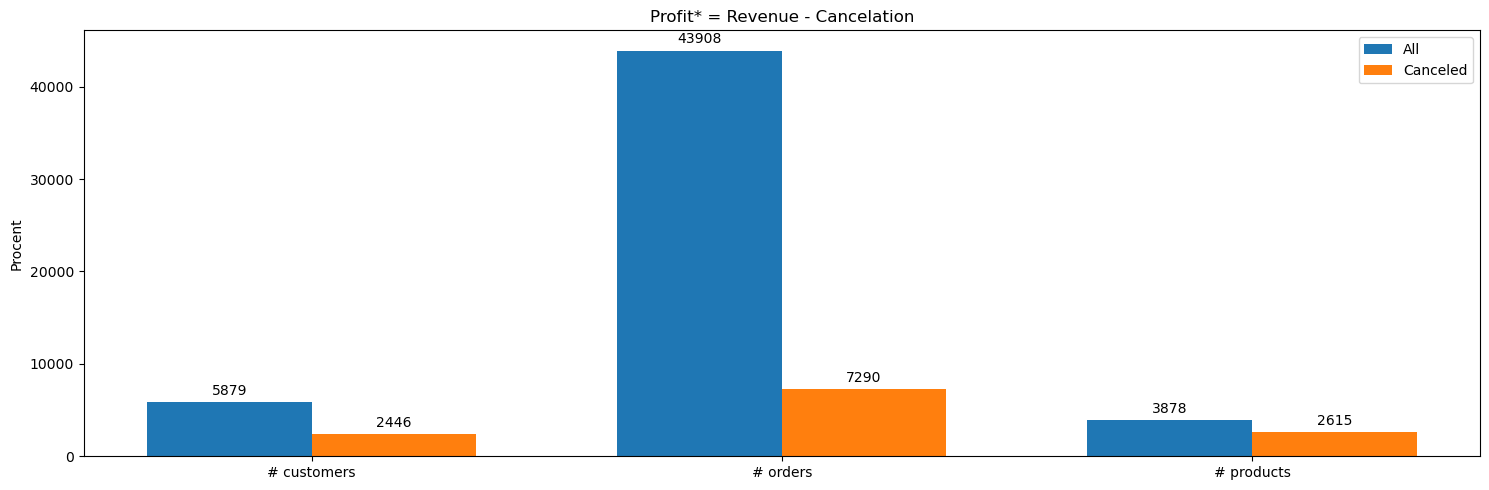

c:\Users\Rabo Yusuf\Desktop\Python-Crash-Course\DWthon\helper.py:51: FutureWarning: The operation <function sum at 0x000001A1513AFBE0> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  df_price = df.groupby(main_feat).agg(


Unikalnych klientów: 5879
22.5% to 1324 klientów


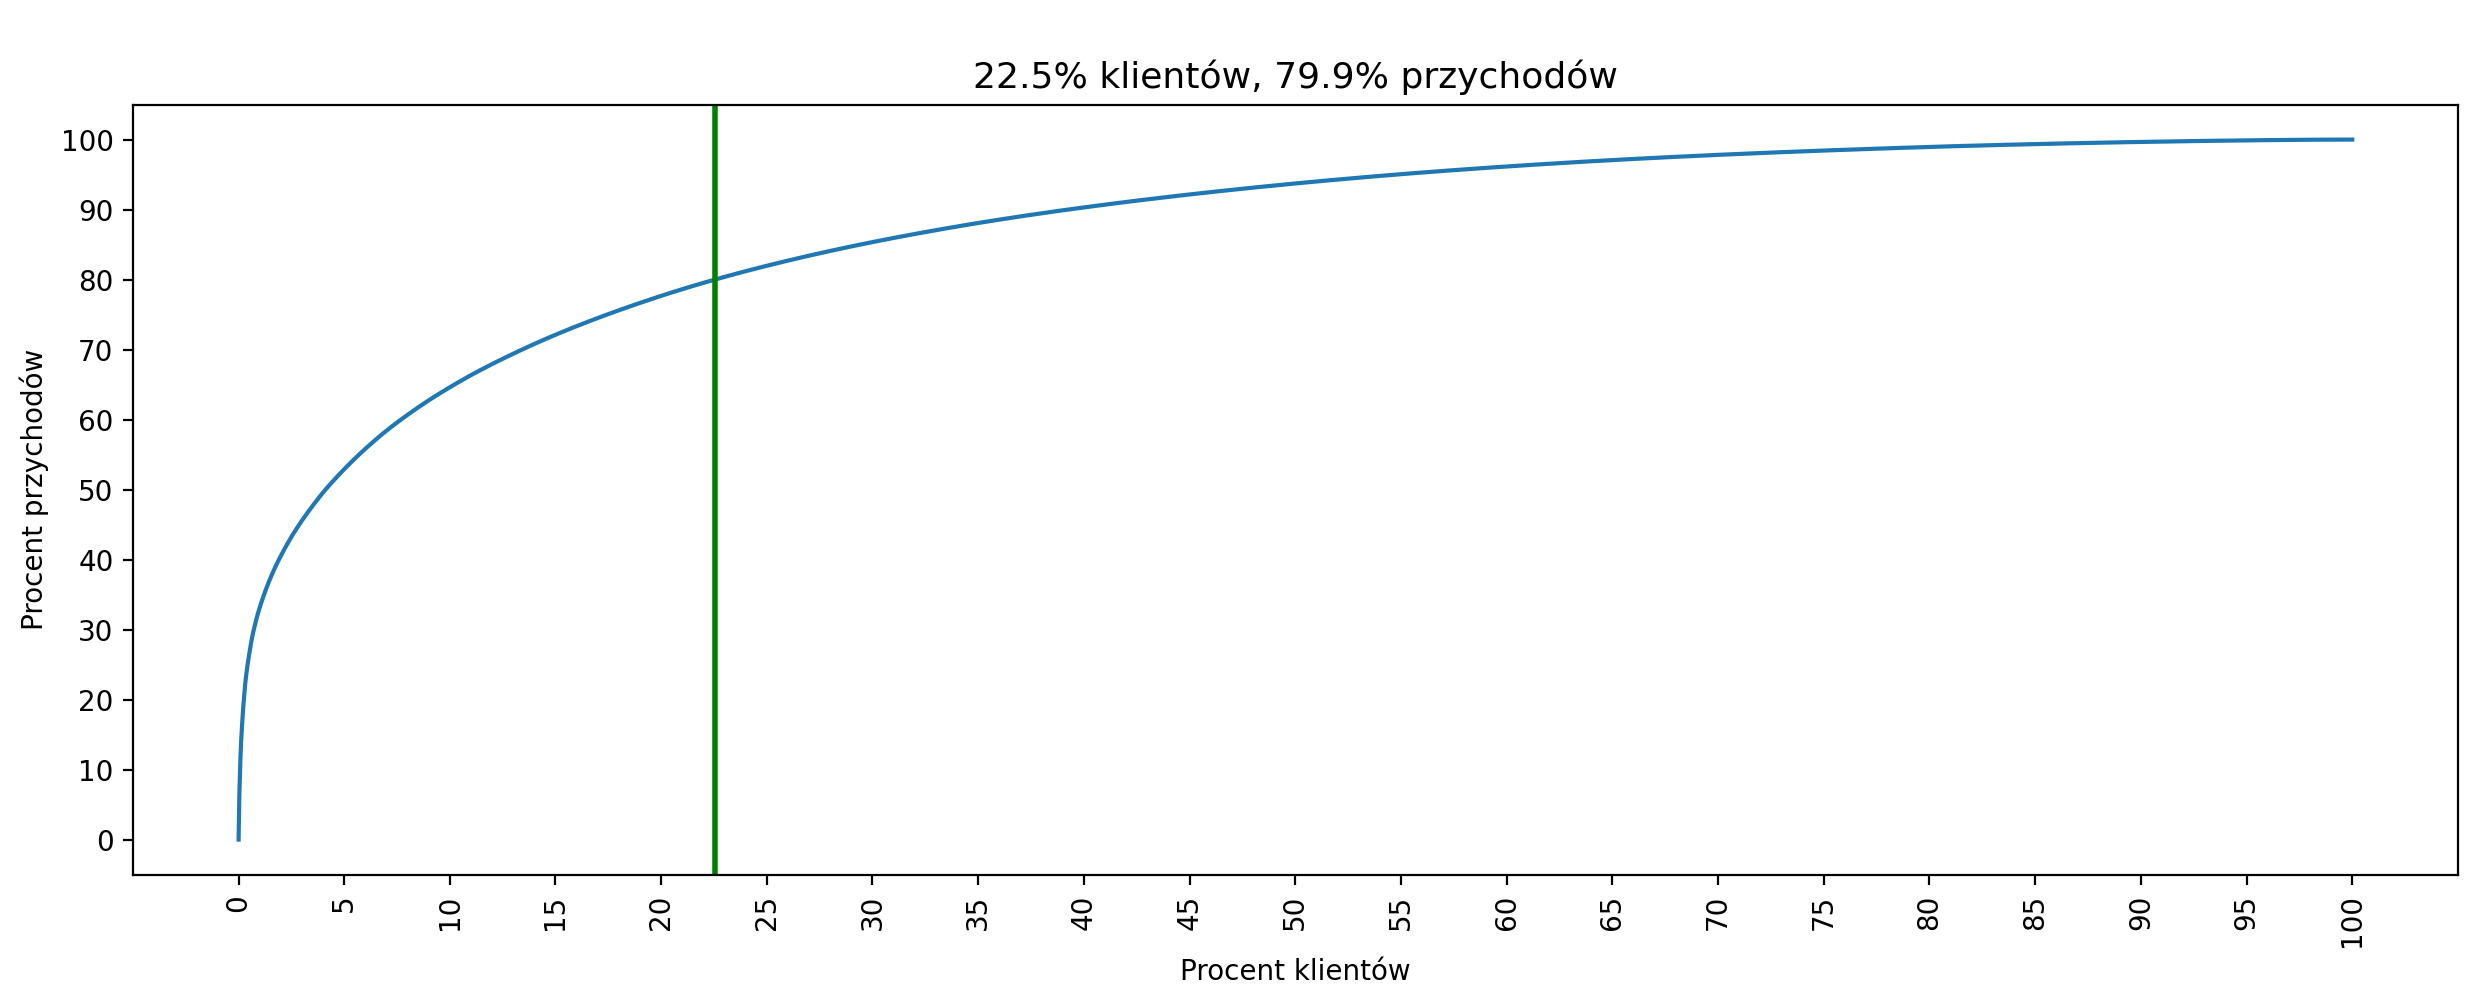

In [3]:
# % of product that generate 80% revenue

import pandas as pd
import helper as h
df = pd.read_hdf('./data.h5')
sorted_product = (
    df[['product_id', 'price_total']]
    .groupby('product_id')
    .agg('sum')
    .sort_values(by='price_total', ascending=False)
    .reset_index()
    )
sorted_product['price_cumsum'] = sorted_product['price_total'].cumsum()
print(sorted_product)
print('...............................')
max_val = sorted_product['price_cumsum'].tail(1).values[0]
value_80prc = max_val * 0.8
top_product = sorted_product[sorted_product['price_cumsum'] < value_80prc]['product_id']
print(len(top_product))
total_products = sorted_product['product_id'].nunique()
top_client = 925
total_products = 3878
print('percentage of products', ((top_client) / total_products) * 100)
h.plot_canceled(df)
args = {
    'df': df,
    'sel_x_prct': 'auto_80',
    'main_feat': 'customer_id',
    'price_feat': 'price_total',
}

h.plot_pareto(**args)


In [12]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot') #style
matplotlib.rcParams['figure.figsize'] = (12, 5)#size graph
df = pd.read_hdf("./data.h5")

# print(df.shape)
# df.sample(5)

df_customers = (
    df[ ["price_total", "customer_id"] ]
    .groupby("customer_id")
    .agg("sum")
    .reset_index()
    .sort_values(by="price_total", ascending=False)
    .rename(columns={"price_total": "customer_price_total"})
)
print(df_customers)

df_customers["cumsum"] = df_customers["customer_price_total"].cumsum()
df_customers.head(5)
value_80prc = int(df["price_total"].sum() * 0.8)
df_customers["most_revenue_customer"] = df_customers["cumsum"] < value_80prc
print('.....................................')
df_customers["most_revenue_customer"].value_counts()

      customer_id  customer_price_total
448           448              61130939
907           907              53007160
2647         2647              33695110
179           179              31039769
66             66              29774259
...           ...                   ...
4594         4594                   295
180           180                   250
4286         4286                     0
4784         4784                     0
4785         4785                     0

[5879 rows x 2 columns]


False    4555
True     1324
Name: most_revenue_customer, dtype: int64